### TASK 1 
# LOAD AND GETTING FAMILIAR WITH NETCDF DATASETS

Reference notebook forthe first task of the Climate Geospatial Analysis with 
Python and Xarray project on Coursera. 



In [2]:
import xarray as xr

In [3]:
ds = xr.open_dataset('data.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### TASK 2
# Select and Filter data through coordinates 

Reference notebook for the second task of the Climate Geospatial Analysis with Python and Xarray projectt on Coursera. 

Task: We are going to learn how to use the Xarray selectors as well as the where method so that we can navigate
around our data. 
-Xarray selectors allows you to filter across multidimension without hassles, and it is an very powerful feature when 
dealing with geospatial data. 

# LOAD DATA

- So to get started let;s open task 2 notebook. Run all the cells so that we load the previous task data. 
Before going further, take a note of our current dimensions: It is an structure which has length 31 across
the latitude, 27 across the longitude, and 937 across the time dimension. This is an 3D structure, and you coluld
imagine our data ss being points over an cube. 

In [5]:
import xarray as xr

In [6]:
ds = xr. open_dataset('data.nc') 

In [7]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [8]:
ds.sel(longitude=-82)

<xarray.Dataset>
Dimensions:    (latitude: 89, expver: 2, time: 500)
Coordinates:
    longitude  float32 -82.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude) float32 ...
    skt        (time, expver, latitude) float32 ...
    tp         (time, expver, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [9]:
ds.sel(longitude=-82, latitude=5.75,time='2018-01-01')

<xarray.Dataset>
Dimensions:    (expver: 2)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 5.75
  * expver     (expver) int32 1 5
    time       datetime64[ns] 2018-01-01
Data variables:
    lai_hv     (expver) float32 ...
    skt        (expver) float32 ...
    tp         (expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [10]:
#doesn't exist in the dataset and will cause an error: ds.sel(longitude=99) 
ds.sel(latitude=99, method='nearest')

<xarray.Dataset>
Dimensions:    (longitude: 142, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
    latitude   float32 6.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, longitude) float32 ...
    skt        (time, expver, longitude) float32 ...
    tp         (time, expver, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [11]:
ds.sel(latitude=[-16,-15], longitude=[-46, -47], method='nearest')

<xarray.Dataset>
Dimensions:    (longitude: 2, latitude: 2, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -46.75 -47.0
  * latitude   (latitude) float32 -16.0 -15.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [12]:
ds.isel(latitude=0, longitude=0)

<xarray.Dataset>
Dimensions:    (expver: 2, time: 500)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 6.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver) float32 ...
    skt        (time, expver) float32 ...
    tp         (time, expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [13]:
QUERY = ds.longitude < -64
QUERY = QUERY & (ds.longitude < -8)

ds.where(QUERY, drop =True) 

<xarray.Dataset>
Dimensions:    (time: 500, expver: 2, latitude: 89, longitude: 72)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -64.75 -64.5 -64.25
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 0.0 0.0 ... 5.755
    skt        (time, expver, latitude, longitude) float32 300.7 300.6 ... 296.3
    tp         (time, expver, latitude, longitude) float32 0.0004338 ... 0.00...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### Task 3

# Visualize multidimensional and geospatial variables 

Reference notebook for the second task of the Climate Geospatial Anlaysis with 
Python and Xarray project on Coursera.

---
- Task: We are going to learn how to use Xarray integration with Matplotlib so that we can see 'visualization fo our geospatial data. By the end of it, our project will take an much more visual aspect! 

- As will you see, this is ad simple as just passing an method over an variable. So let's get started and open the task 3 noteboook. Run all blocks so that we have the data set up. 



In [14]:
import xarray as xr

In [15]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [16]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.84399414, 271.17169189, 275.49935913, 279.82705688,
        284.15472412, 288.48242188, 292.81011963, 297.13778687,
        301.46548462, 305.79315186, 310.12084961]),
 <BarContainer object of 10 artists>)

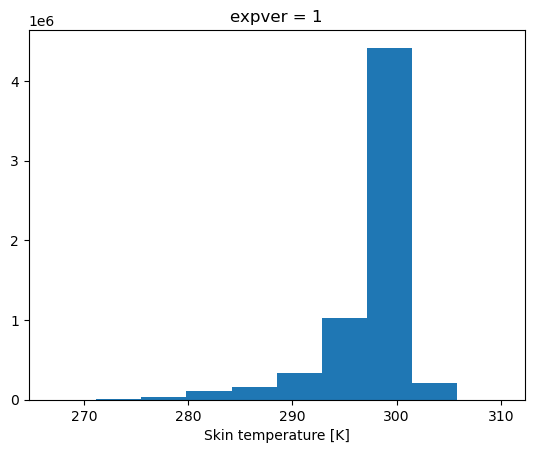

In [17]:
ds.skt.plot()

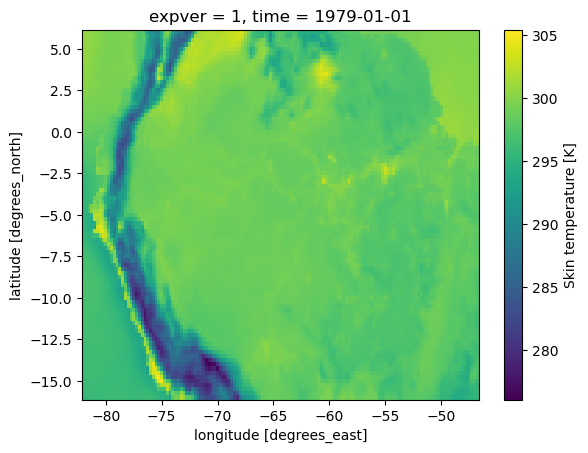

In [18]:
ds.isel(time=0).skt.plot() #amazon forest

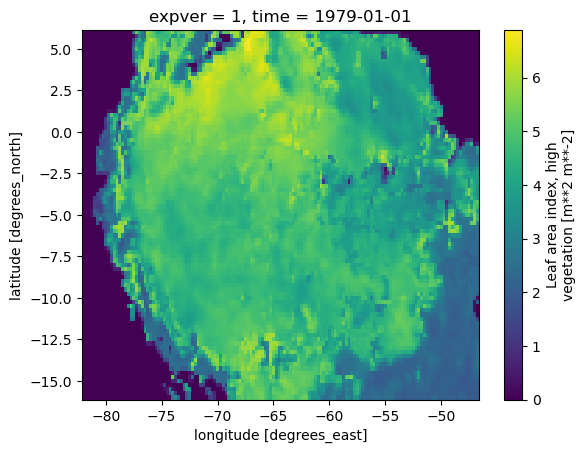

In [19]:
ds.isel(time=0).lai_hv.plot()

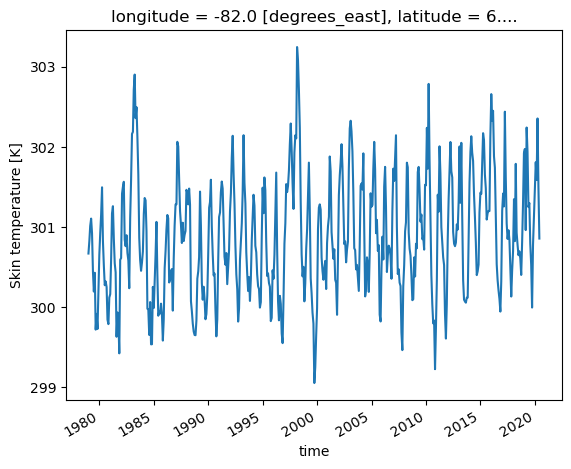

In [20]:
ds.isel(longitude=0, latitude=0).skt.plot()

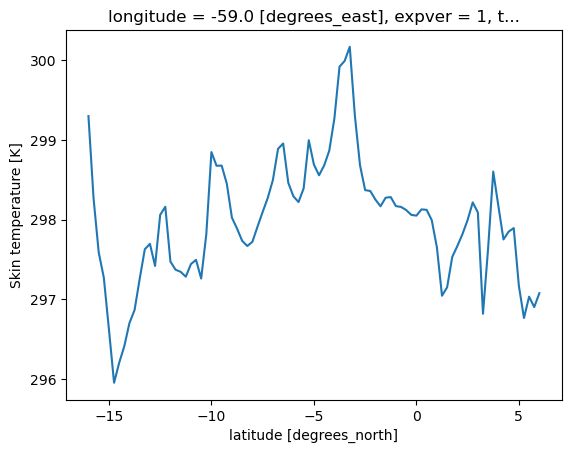

In [21]:
ds.isel(time=0).sel(longitude=-59, method='nearest') .skt.plot()

### Task 4

# Apply simple Operations over multidimensional data

Reference notebook for the second task of the Climate Geospatial Anlaysis with 
Python and Xarray project on Coursera.

---
- Task: We are going to learn how to apply simple multidimensional Operations, like substracting and getting the mean. As we'll see, Xarray will allow to have an consistent experience even though we are handling several dimensions 

- So in order to start, let's open the task 4 notebook. Run the first blocks, and then open a new cell. 

In [22]:
import xarray as xr

In [23]:
ds= xr.open_dataset('data.nc').sel(expver=1)

In [24]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [25]:
temp_change = (ds.skt.sel(time='2019-01-01')- ds.skt.sel(time='1979-01-01'))

temp_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

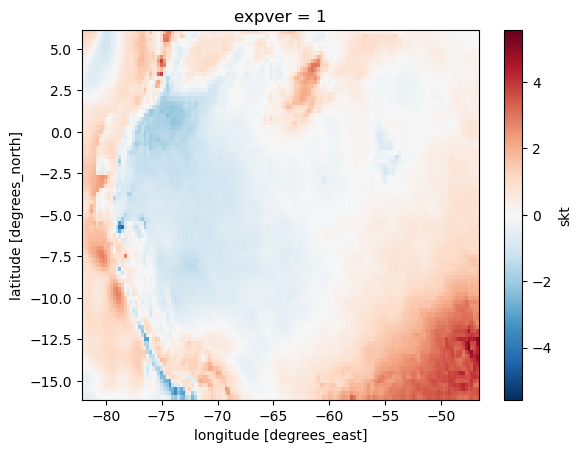

In [26]:
temp_change.plot()

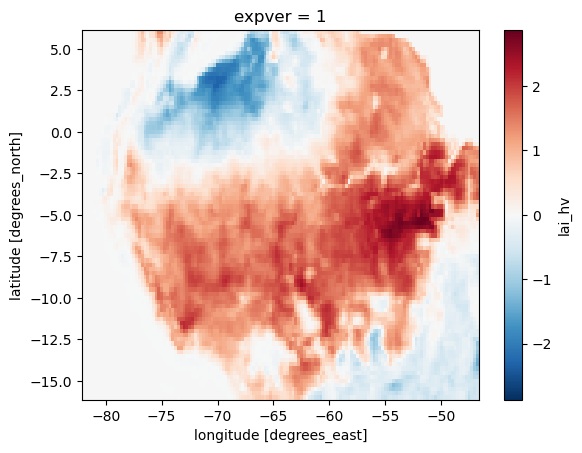

In [27]:
seasonal_change = (ds.lai_hv.sel(time='2019-07-01')
                    -ds.lai_hv.sel(time='2019-01-01'))
seasonal_change.plot()

In [28]:
ds.skt.mean()

<xarray.DataArray 'skt' ()>
array(297.2683, dtype=float32)
Coordinates:
    expver   int32 1

In [29]:
mean_temp = ds.skt.mean(dim='time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[300.8873 , 300.82703, 300.74887, ..., 300.67136, 300.66446,
        300.68234],
       [300.84076, 300.78116, 300.67752, ..., 300.68323, 300.6837 ,
        300.6877 ],
       [300.74652, 300.67358, 300.57083, ..., 300.68448, 300.693  ,
        300.69904],
       ...,
       [293.93396, 293.92303, 293.89307, ..., 296.69812, 296.79724,
        296.8227 ],
       [293.86404, 293.85193, 293.81693, ..., 296.30548, 296.46127,
        296.48813],
       [293.79874, 293.77878, 293.74445, ..., 296.21536, 296.3526 ,
        296.1909 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

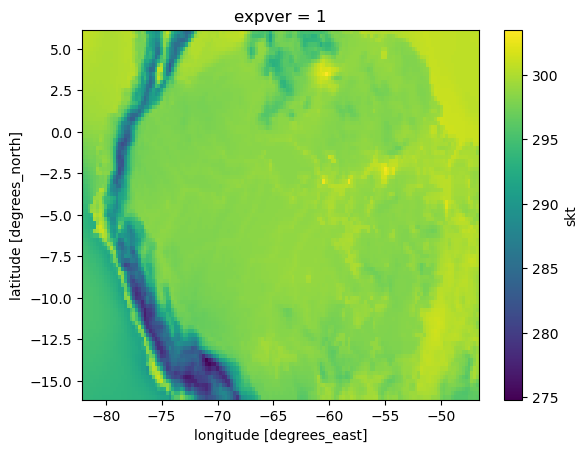

In [30]:
mean_temp.plot()

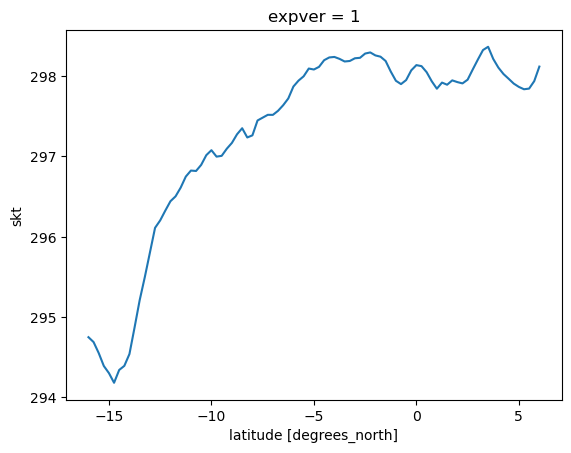

In [31]:
ds.skt.mean(dim=['time', 'longitude']).plot()

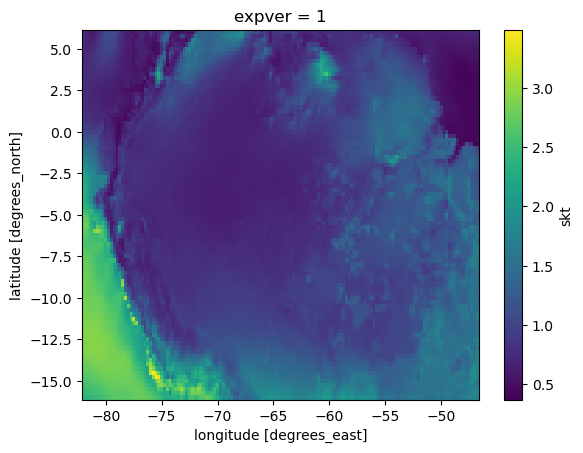

In [32]:
ds.skt.std(dim='time').plot()

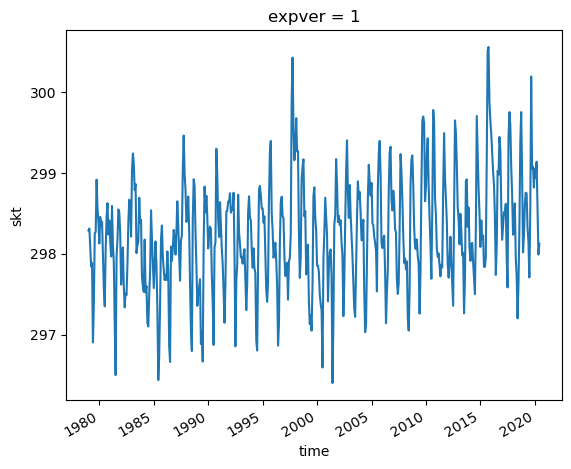

In [33]:
ds.skt.median(dim=['latitude', 'longitude']).plot()

### Task 5

# Apply grouped operations over multidimensional data

Reference notebook for the second task of the Climate Geospatial Anlaysis with 
Python and Xarray project on Coursera.

---
- Task: We are going to learn how to apply operations thatt involves grouping and resampling. This will greatly increase the scope of what you can do with categorical and temporal datasetsm and it is a powerful tool to have.
- In order to start, let's open the task 5 notebook. Run everything as is. 

In [34]:
import xarray as xr

In [35]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [36]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

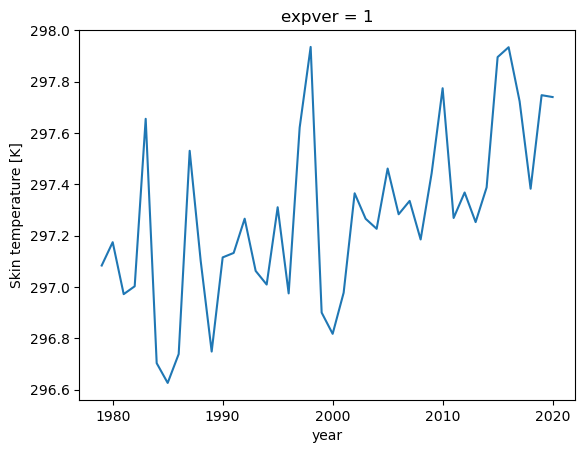

In [37]:
(ds.groupby(ds.time.dt.year)
     .mean(dim=['time', 'latitude', 'longitude'])
     .skt
     .plot())

In [38]:
(ds.groupby(ds.time.dt.year)
     .mean(dim=['time', 'latitude', 'longitude'])
     .skt)

<xarray.DataArray 'skt' (year: 42)>
array([297.08368, 297.17456, 296.9722 , 297.0028 , 297.65518, 296.70334,
       296.6264 , 296.73883, 297.5306 , 297.1022 , 296.74857, 297.11533,
       297.13272, 297.26608, 297.06268, 297.0096 , 297.3107 , 296.9751 ,
       297.6209 , 297.93518, 296.90033, 296.81763, 296.97772, 297.36505,
       297.26578, 297.2267 , 297.46146, 297.2834 , 297.33542, 297.18515,
       297.44296, 297.77426, 297.26892, 297.36813, 297.25284, 297.38797,
       297.89557, 297.93402, 297.72333, 297.3828 , 297.74722, 297.73993],
      dtype=float32)
Coordinates:
    expver   int32 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020
Attributes:
    units:      K
    long_name:  Skin temperature

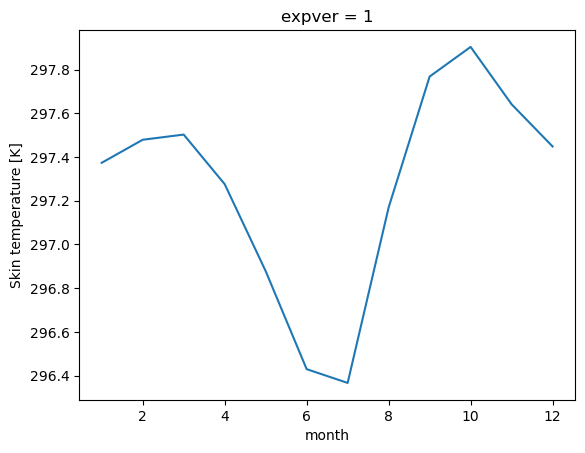

In [39]:
(ds.groupby(ds.time.dt.month)
     .mean(dim=['time', 'latitude', 'longitude'])
     .skt
     .plot())

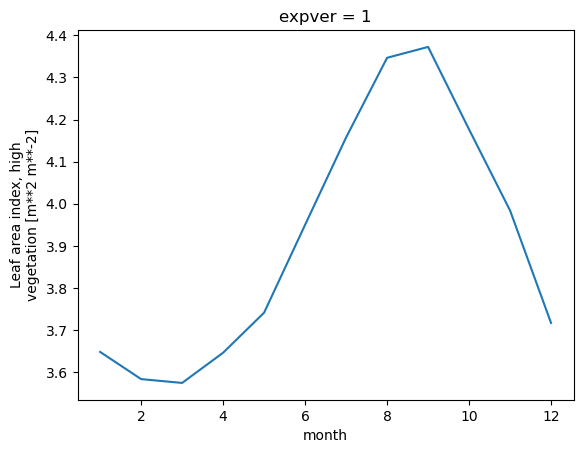

In [40]:
(ds.groupby(ds.time.dt.month)
     .mean(dim=['time', 'latitude', 'longitude'])
     .lai_hv
     .plot())

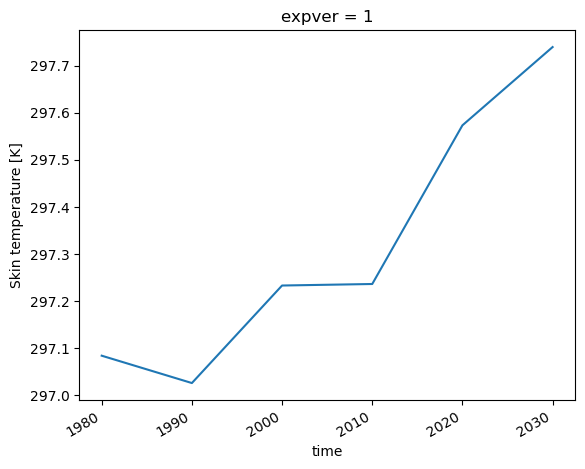

In [41]:
(ds.resample({'time': '10y'})
    .mean(dim=['time', 'latitude', 'longitude'])
    .skt
    .plot())

### Task 6

# Merge and Concatenate Datasets

Reference notebook for the second task of the Climate Geospatial Anlaysis with 
Python and Xarray project on Coursera.

---
- Task: We are going to learn how we merge and concatenate datasets and variables on Xarray. 
This is important if you are generating dat or handling several sources, as it allows you to mix everything together into a single object. 
-So let's start by opening the task 6 notebook. Run everything as it is. 

In [42]:
import xarray as xr

In [43]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [44]:
da = ds.time.dt.year
da

<xarray.DataArray 'year' (time: 500)>
array([1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979,
       1979, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       1980, 1980, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       1981, 1981, 1981, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982,
       1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
       1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986,
       1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987,
       1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1988, 1988,
       1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1989,
       1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997,
...
       2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020])
Coordinates:
    expver   int32 1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

In [45]:
ds_1 = ds.merge(da)
ds_1

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    year       (time) int64 1979 1979 1979 1979 1979 ... 2020 2020 2020 2020
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [46]:
da = ds.longitude ** 2 + ds.latitude ** 2
da.name = 'squared_distance'
ds_2 = ds.merge(da) 
ds_2

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 ...
    skt               (time, latitude, longitude) float32 ...
    tp                (time, latitude, longitude) float32 ...
    squared_distance  (longitude, latitude) float32 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [47]:
ds_3 = ds_1.merge(ds_2)
ds_3

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 0.0 0.0 ... nan nan
    skt               (time, latitude, longitude) float32 300.7 300.6 ... nan
    tp                (time, latitude, longitude) float32 0.0004338 ... nan
    year              (time) int64 1979 1979 1979 1979 ... 2020 2020 2020 2020
    squared_distance  (longitude, latitude) float32 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [48]:
ds_square_root = ds_3 **(1/2)
ds_cube_root = ds_3 ** (1/3)
ds_4 = xr.concat([ds_3, ds_square_root, ds_cube_root],'dim_power' )

In [49]:
ds_4

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500, dim_power: 3)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Dimensions without coordinates: dim_power
Data variables:
    lai_hv            (dim_power, time, latitude, longitude) float32 0.0 ... nan
    skt               (dim_power, time, latitude, longitude) float32 300.7 .....
    tp                (dim_power, time, latitude, longitude) float32 0.000433...
    year              (dim_power, time) float64 1.979e+03 1.979e+03 ... 12.64
    squared_distance  (dim_power, longitude, latitude) float32 6.76e+03 ... 1...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

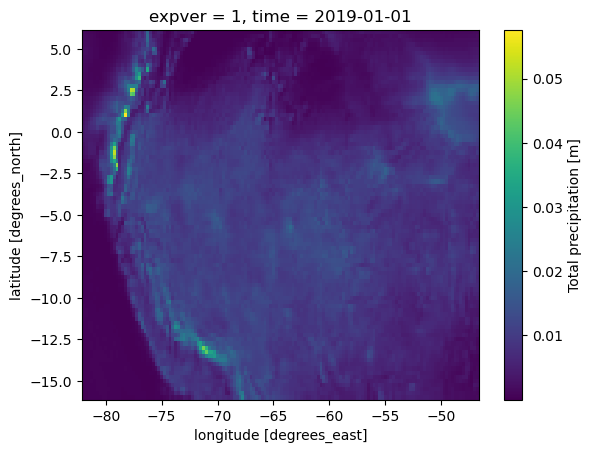

In [50]:
ds.sel(time= '2019-01-01').tp.plot()

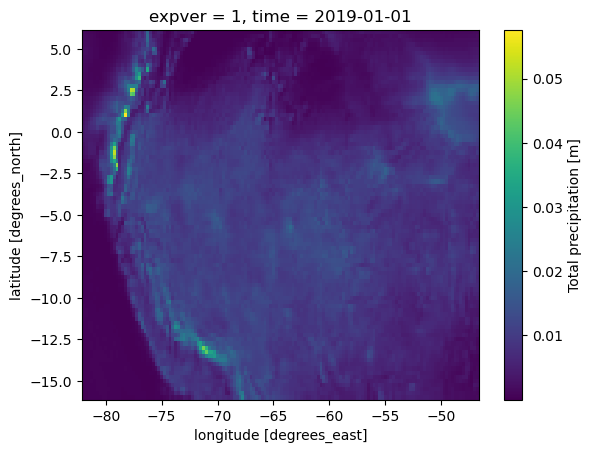

In [51]:
ds_4.sel(dim_power=0, time= '2019-01-01').tp.plot()

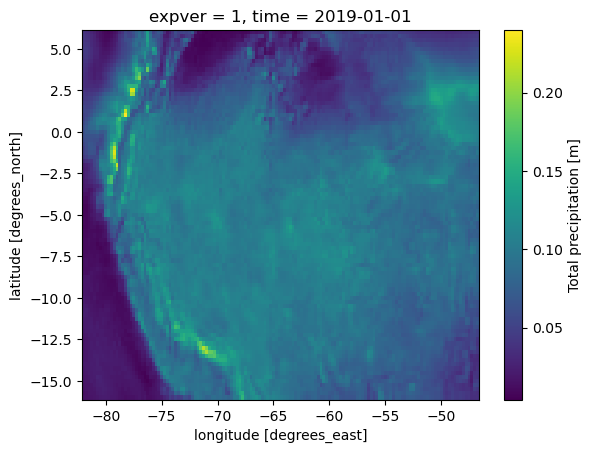

In [52]:
ds_4.sel(dim_power=1, time= '2019-01-01').tp.plot()

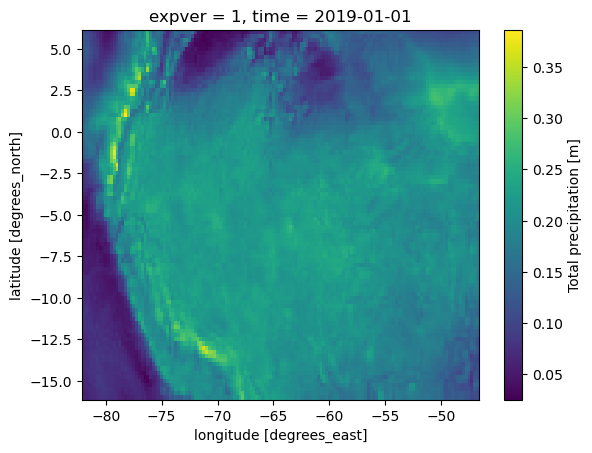

In [53]:
ds_4.sel(dim_power=2, time= '2019-01-01').tp.plot()

### Task 6

# Interact with Pandas and export datasets 

Reference notebook for the second task of the Climate Geospatial Anlaysis with 
Python and Xarray project on Coursera.

---
- Task: We are going to learn to interface Xarray with Pandas through exporting and importing objects. As well 
as to how to export Xarray datasets to NETCDF files. This knowledge is important when working into a Data Science workflow.
Let's start by opening the task 7 notebook. Run everything 

In [54]:
import xarray as xr

In [55]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [56]:
df= ds.to_dataframe()
df

expver    lai_hv         skt        tp
longitude latitude time                                              
-82.00     6.0     1979-01-01       1  0.000000  300.670105  0.000434
                   1979-02-01       1  0.000000  300.829926  0.001139
                   1979-03-01       1  0.000000  301.014832  0.005566
                   1979-04-01       1  0.000000  301.105957  0.011398
                   1979-05-01       1  0.000000  300.924347  0.009486
...                               ...       ...         ...       ...
-46.75    -16.0    2020-04-01       1  1.905231  295.797791  0.004340
                   2020-05-01       1  1.735271  293.425049  0.001070
                   2020-06-01       1  1.578286  293.098816  0.000035
                   2020-07-01       1       NaN         NaN       NaN
                   2020-08-01       1       NaN         NaN       NaN

[6319000 rows x 4 columns]

In [57]:
da= ds.time.dt.month
da.to_dataframe()

,expver,month
time,,
1979-01-01,1,1
1979-02-01,1,2
1979-03-01,1,3
1979-04-01,1,4
1979-05-01,1,5
...,...,...
2020-04-01,1,4
2020-05-01,1,5
2020-06-01,1,6


In [58]:
da.to_series()

time
1979-01-01    1
1979-02-01    2
1979-03-01    3
1979-04-01    4
1979-05-01    5
             ..
2020-04-01    4
2020-05-01    5
2020-06-01    6
2020-07-01    7
2020-08-01    8
Name: month, Length: 500, dtype: int64

In [59]:
xr.Dataset.from_dataframe(df)

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    expver     (longitude, latitude, time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    lai_hv     (longitude, latitude, time) float32 0.0 0.0 0.0 ... 1.578 nan nan
    skt        (longitude, latitude, time) float32 300.7 300.8 301.0 ... nan nan
    tp         (longitude, latitude, time) float32 0.0004338 0.001139 ... nan

In [60]:
xr.DataArray.from_series(df.skt)

<xarray.DataArray 'skt' (longitude: 142, latitude: 89, time: 500)>
array([[[300.6701 , 300.82993, 301.01483, ..., 300.857  ,       nan,
               nan],
        [300.647  , 300.77512, 300.85104, ..., 300.8352 ,       nan,
               nan],
        [300.6351 , 300.7619 , 300.71237, ..., 300.8121 ,       nan,
               nan],
        ...,
        [295.848  , 296.73026, 297.36688, ..., 293.81006,       nan,
               nan],
        [295.81894, 296.68536, 297.25528, ..., 293.8061 ,       nan,
               nan],
        [295.77206, 296.6583 , 297.15753, ..., 293.6714 ,       nan,
               nan]],

       [[300.60406, 300.71503, 300.84116, ..., 300.79227,       nan,
               nan],
        [300.58426, 300.63312, 300.65756, ..., 300.80417,       nan,
               nan],
        [300.56906, 300.57236, 300.47595, ..., 300.7784 ,       nan,
               nan],
...
        [295.55347, 296.13065, 296.93893, ..., 293.72025,       nan,
               nan],
        [295.31308, 295.9061 , 296.6028 , ..., 293.30817,       nan,
               nan],
        [295.3362 , 296.01376, 296.56384, ..., 293.1675 ,       nan,
               nan]],

       [[299.58643, 299.99585, 300.03284, ..., 301.48172,       nan,
               nan],
        [299.75018, 300.15436, 300.1418 , ..., 301.52466,       nan,
               nan],
        [299.8968 , 300.27322, 300.2303 , ..., 301.59332,       nan,
               nan],
        ...,
        [295.77997, 296.26733, 297.01688, ..., 293.55383,       nan,
               nan],
        [295.47687, 295.99988, 296.6596 , ..., 293.22165,       nan,
               nan],
        [295.1995 , 295.83215, 296.38223, ..., 293.09882,       nan,
               nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

# NetCDF

In [61]:
ds.to_netcdf('export.nc')

In [62]:
xr.open_dataset('export.nc')

<xarray.Dataset>
Dimensions:    (time: 500, latitude: 89, longitude: 142)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 ...
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...